In [11]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [12]:
data = pd.read_csv("3_predicted_data.csv")

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 425 entries, 0 to 424
Data columns (total 36 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0.1     425 non-null    int64  
 1   class_a          425 non-null    object 
 2   class_b          425 non-null    object 
 3   relation         425 non-null    object 
 4   ans_yamasaki     425 non-null    int64  
 5   ans_ueda         425 non-null    int64  
 6   ans_daisuke      425 non-null    int64  
 7   ans_hosomi       425 non-null    int64  
 8   ans_kazuma       425 non-null    int64  
 9   ans_sugi         425 non-null    int64  
 10  type             425 non-null    object 
 11  title            425 non-null    object 
 12  source           425 non-null    object 
 13  sim_by_mcg       425 non-null    float64
 14  is_a_by_mcg      425 non-null    float64
 15  lexvec_sim       425 non-null    float64
 16  wiki2vec_sim     425 non-null    float64
 17  wn_hu_average   

In [14]:
data["is_correct"] = data.apply(lambda x : x["pred_label"] == x["relation_label"], axis=1)

In [15]:
sum(data["is_correct"]==True)

276

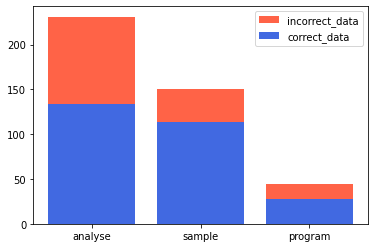

In [25]:
#typeごとに正解不正解の割合をプロットする
def plot_type_distribution(data):
    type_labels = data["type"].unique()
    correct_data = data[data["is_correct"]==True]
    correct = list()
    whole = list()
    for label in type_labels:
        correct.append(sum(correct_data["type"]==label))
        whole.append(sum(data["type"]==label))
    whole_bar = plt.bar(type_labels,whole,color="tomato")
    correct_bar = plt.bar(type_labels, correct, color="royalblue")
    plt.legend((whole_bar[0], correct_bar[0]), ( "incorrect_data","correct_data"))
plot_type_distribution(data)

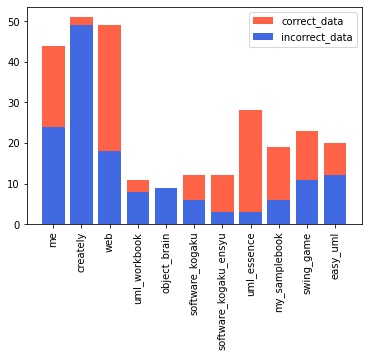

In [8]:
def plot_type_distribution(data):
    type_labels = data["source"].unique()
    correct_data = data[data["is_correct"]==True]
    incorrect_data = data[data["is_correct"]==False]
    correct = list()
    incorrect = list()
    for label in type_labels:
        correct.append(sum(correct_data["source"]==label))
        incorrect.append(sum(incorrect_data["source"]==label))
    p1 = plt.bar(type_labels, correct, color="tomato")
    p2 = plt.bar(type_labels, incorrect, color="royalblue")
    plt.xticks(rotation=90)
    plt.legend((p1[0], p2[0]), ("correct_data", "incorrect_data"))
plot_type_distribution(data)

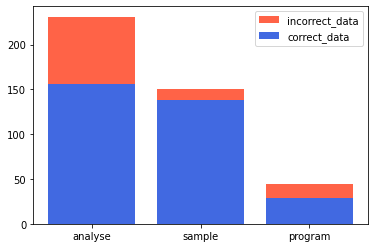

In [28]:
def plot_type_distribution2(data):
    type_labels = data["type"].unique()
    data["ans_correct"] = data.apply(lambda x : x["ans_sugi"] == x["relation_label"], axis=1)
    correct_data = data[data["ans_correct"]==True]
    
    correct = list()
    whole = list()
    for label in type_labels:
        correct.append(sum(correct_data["type"]==label))
        whole.append(sum(data["type"]==label))
    whole_bar = plt.bar(type_labels,whole,color="tomato")
    correct_bar = plt.bar(type_labels, correct, color="royalblue")
    plt.legend((whole_bar[0], correct_bar[0]), ( "incorrect_data","correct_data"))
plot_type_distribution2(data)
